In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'D:\Data science\Data sample\Employee retention\HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [45]:
dumm=pd.get_dummies(df.salary)
dum=(dumm==1).astype(int)

In [122]:
merge=pd.concat([dum,df],axis='columns')

In [3]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [4]:
df.salary.value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [5]:
df.sales.value_counts()

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [6]:
df.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [7]:
df.satisfaction_level.mean()

0.6128335222348156

In [8]:
df.average_montly_hours.mean()

201.0503366891126

In [9]:
df.Work_accident.value_counts()

Work_accident
0    12830
1     2169
Name: count, dtype: int64

In [10]:
df.promotion_last_5years.value_counts()

promotion_last_5years
0    14680
1      319
Name: count, dtype: int64

In [11]:
df.number_project.value_counts()

number_project
4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: count, dtype: int64

In [24]:
lef=df['left'][(df.salary=='low') & (df.left==1)]
lef.value_counts()

left
1    2172
Name: count, dtype: int64

In [19]:
lef=df['left'][(df.promotion_last_5years==0) & (df.left==1)]
lef.value_counts()

left
1    3552
Name: count, dtype: int64

In [21]:
lef=df['left'][(df.Work_accident==1) & (df.left==1)]
lef.value_counts()

left
1    169
Name: count, dtype: int64

In [23]:
lef=df['left'][(df.satisfaction_level<0.1) & (df.left==1)]
lef.value_counts()

left
1    195
Name: count, dtype: int64

<Axes: xlabel='left', ylabel='salary'>

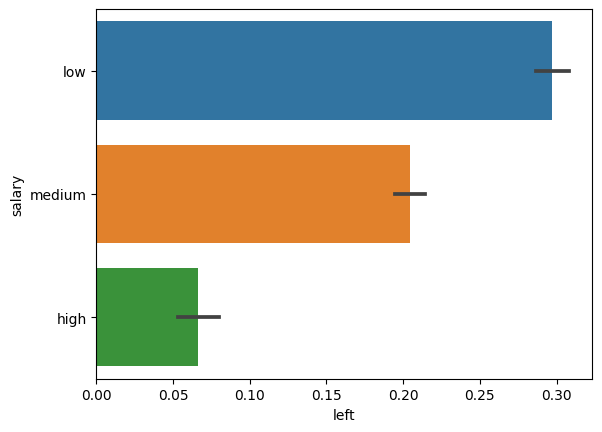

In [43]:
sns.barplot(x='left',y='salary',data=df)

<Axes: xlabel='left', ylabel='sales'>

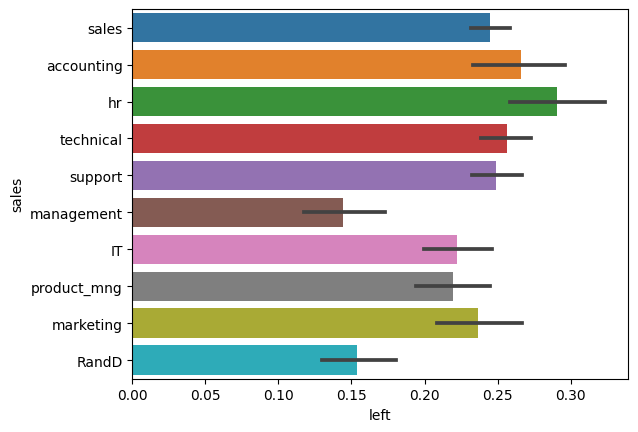

In [42]:
sns.barplot(x='left',y='sales',data=df)

In [119]:
X=merge[['promotion_last_5years','high','low','medium']]
y=merge['left']

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)
left_model=LogisticRegression()
left_model.fit(X_train,y_train)


LogisticRegression()

In [131]:
acc=left_model.score(X_test,y_test)
# print(f'Model Accuracy :{acc*100:.}')
print(f'Accuracy of model :{acc*100:.2f}')

Accuracy of model :75.97


In [132]:
m=left_model.predict([[1,0,0,1]])
# pred=pd.Series(m)
# pred.value_counts()

C:\Users\Razaque\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
